In [1]:
!pip install -q kaggle

In [2]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = '/content/'

In [3]:
!chmod 600 /content/kaggle.json

In [4]:
!kaggle datasets download -d mashlyn/online-retail-ii-uci

Dataset URL: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci
License(s): CC0-1.0
online-retail-ii-uci.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip online-retail-ii-uci.zip

Archive:  online-retail-ii-uci.zip
replace online_retail_II.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: online_retail_II.csv    


# Customer Segmentaition

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("online_retail_II.csv")
df.shape

(1067371, 8)

In [8]:
df.dropna(inplace=True)
df.shape

(824364, 8)

In [9]:
df = df[~df["Invoice"].str.startswith("C")]
df.shape

(805620, 8)

In [10]:
invalid_codes = [item for item in set(df["StockCode"]) if not item[0].isdigit()]
invalid_codes

['C2',
 'BANK CHARGES',
 'TEST001',
 'TEST002',
 'D',
 'DOT',
 'M',
 'POST',
 'ADJUST',
 'ADJUST2',
 'PADS',
 'SP1002']

In [11]:
df = df[~df["StockCode"].isin(invalid_codes)]
df.shape

(802693, 8)

In [12]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [13]:
df["Customer ID"].unique().shape

(5853,)

In [14]:
customer_df = df[["Customer ID", "StockCode", "Quantity"]].groupby(["Customer ID", "StockCode"]).sum().reset_index().pivot(index="Customer ID", columns="StockCode", values="Quantity").fillna(0)
customer_df

StockCode,10002,10080,10109,10120,10123C,10123G,10124A,10124G,10125,10133,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
Customer ID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18284.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18285.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
customer_df.describe()

StockCode,10002,10080,10109,10120,10123C,10123G,10124A,10124G,10125,10133,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
count,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,...,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000
mean,1.473432,0.051768,0.000683,0.113446,0.107979,0.383735,0.010593,0.006322,0.344439,0.572527,...,0.005296,0.009909,0.009055,0.019648,0.007347,0.002221,0.003930,0.002392,0.010764,0.002904
std,35.234846,1.327152,0.052284,1.836846,3.072761,20.407093,0.226169,0.186142,7.030687,5.889772,...,0.190709,0.313576,0.287148,0.676318,0.286601,0.157394,0.168884,0.157934,0.647346,0.160607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2484.000000,74.000000,4.000000,60.000000,144.000000,1104.000000,9.000000,10.000000,450.000000,190.000000,...,12.000000,15.000000,16.000000,47.000000,17.000000,12.000000,12.000000,12.000000,48.000000,12.000000


In [16]:
customer_df.sum(axis=1)

,0
Customer ID,
12346.0,74239.0
12347.0,3286.0
12348.0,2704.0
12349.0,1621.0
12350.0,196.0
...,...
18283.0,1731.0
18284.0,493.0
18285.0,144.0


# Try Kmeans

In [17]:
from sklearn.cluster import KMeans

In [18]:
MIN_K = 2
MAX_K = 20
results = {}

In [19]:
for k in range(MIN_K, MAX_K + 1):
  km = KMeans(n_clusters=k)
  km.fit(customer_df)
  results[k] = {
      "inertia": km.inertia_,
      "labels": km.labels_,
      "centroids": km.cluster_centers_,
      "n_iter": km.n_iter_
  }
  print(f'kmean with k: {k}, inertia: {km.inertia_}, n_iter: {km.n_iter_}')

kmean with k: 2, inertia: 18074267494.324318, n_iter: 2
kmean with k: 3, inertia: 16063606330.665907, n_iter: 2
kmean with k: 4, inertia: 10556770541.872639, n_iter: 2
kmean with k: 5, inertia: 10720794744.327358, n_iter: 6
kmean with k: 6, inertia: 8819043739.799368, n_iter: 2
kmean with k: 7, inertia: 7552705682.457046, n_iter: 2
kmean with k: 8, inertia: 7074108238.650703, n_iter: 2
kmean with k: 9, inertia: 6308278975.895159, n_iter: 2
kmean with k: 10, inertia: 7015297897.408749, n_iter: 2
kmean with k: 11, inertia: 6032588628.315161, n_iter: 2
kmean with k: 12, inertia: 5237597469.742294, n_iter: 3
kmean with k: 13, inertia: 5153843065.962576, n_iter: 2
kmean with k: 14, inertia: 4934894540.005741, n_iter: 2
kmean with k: 15, inertia: 4218534280.0542054, n_iter: 11
kmean with k: 16, inertia: 4579390649.650708, n_iter: 7
kmean with k: 17, inertia: 3912391489.0909495, n_iter: 2
kmean with k: 18, inertia: 3811932085.050832, n_iter: 5
kmean with k: 19, inertia: 3815584282.657766, n_i

In [20]:
for k in results:
  print(np.unique(results[k]["labels"], return_counts=True))

(array([0, 1], dtype=int32), array([5852,    1]))
(array([0, 1, 2], dtype=int32), array([5851,    1,    1]))
(array([0, 1, 2, 3], dtype=int32), array([5850,    1,    1,    1]))
(array([0, 1, 2, 3, 4], dtype=int32), array([  19,    1,    1,    2, 5830]))
(array([0, 1, 2, 3, 4, 5], dtype=int32), array([5847,    1,    1,    2,    1,    1]))
(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), array([5845,    1,    1,    2,    1,    1,    2]))
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([5840,    1,    1,    2,    1,    2,    1,    5]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([5843,    1,    1,    1,    1,    1,    1,    2,    2]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([5842,    1,    1,    1,    2,    1,    2,    1,    1,    1]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32), array([5841,    1,    1,    1,    1,    1,    1,    2,    1,    1,    2]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([5840, 

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)

In [23]:
customer_2d = pca.fit_transform(customer_df)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have va

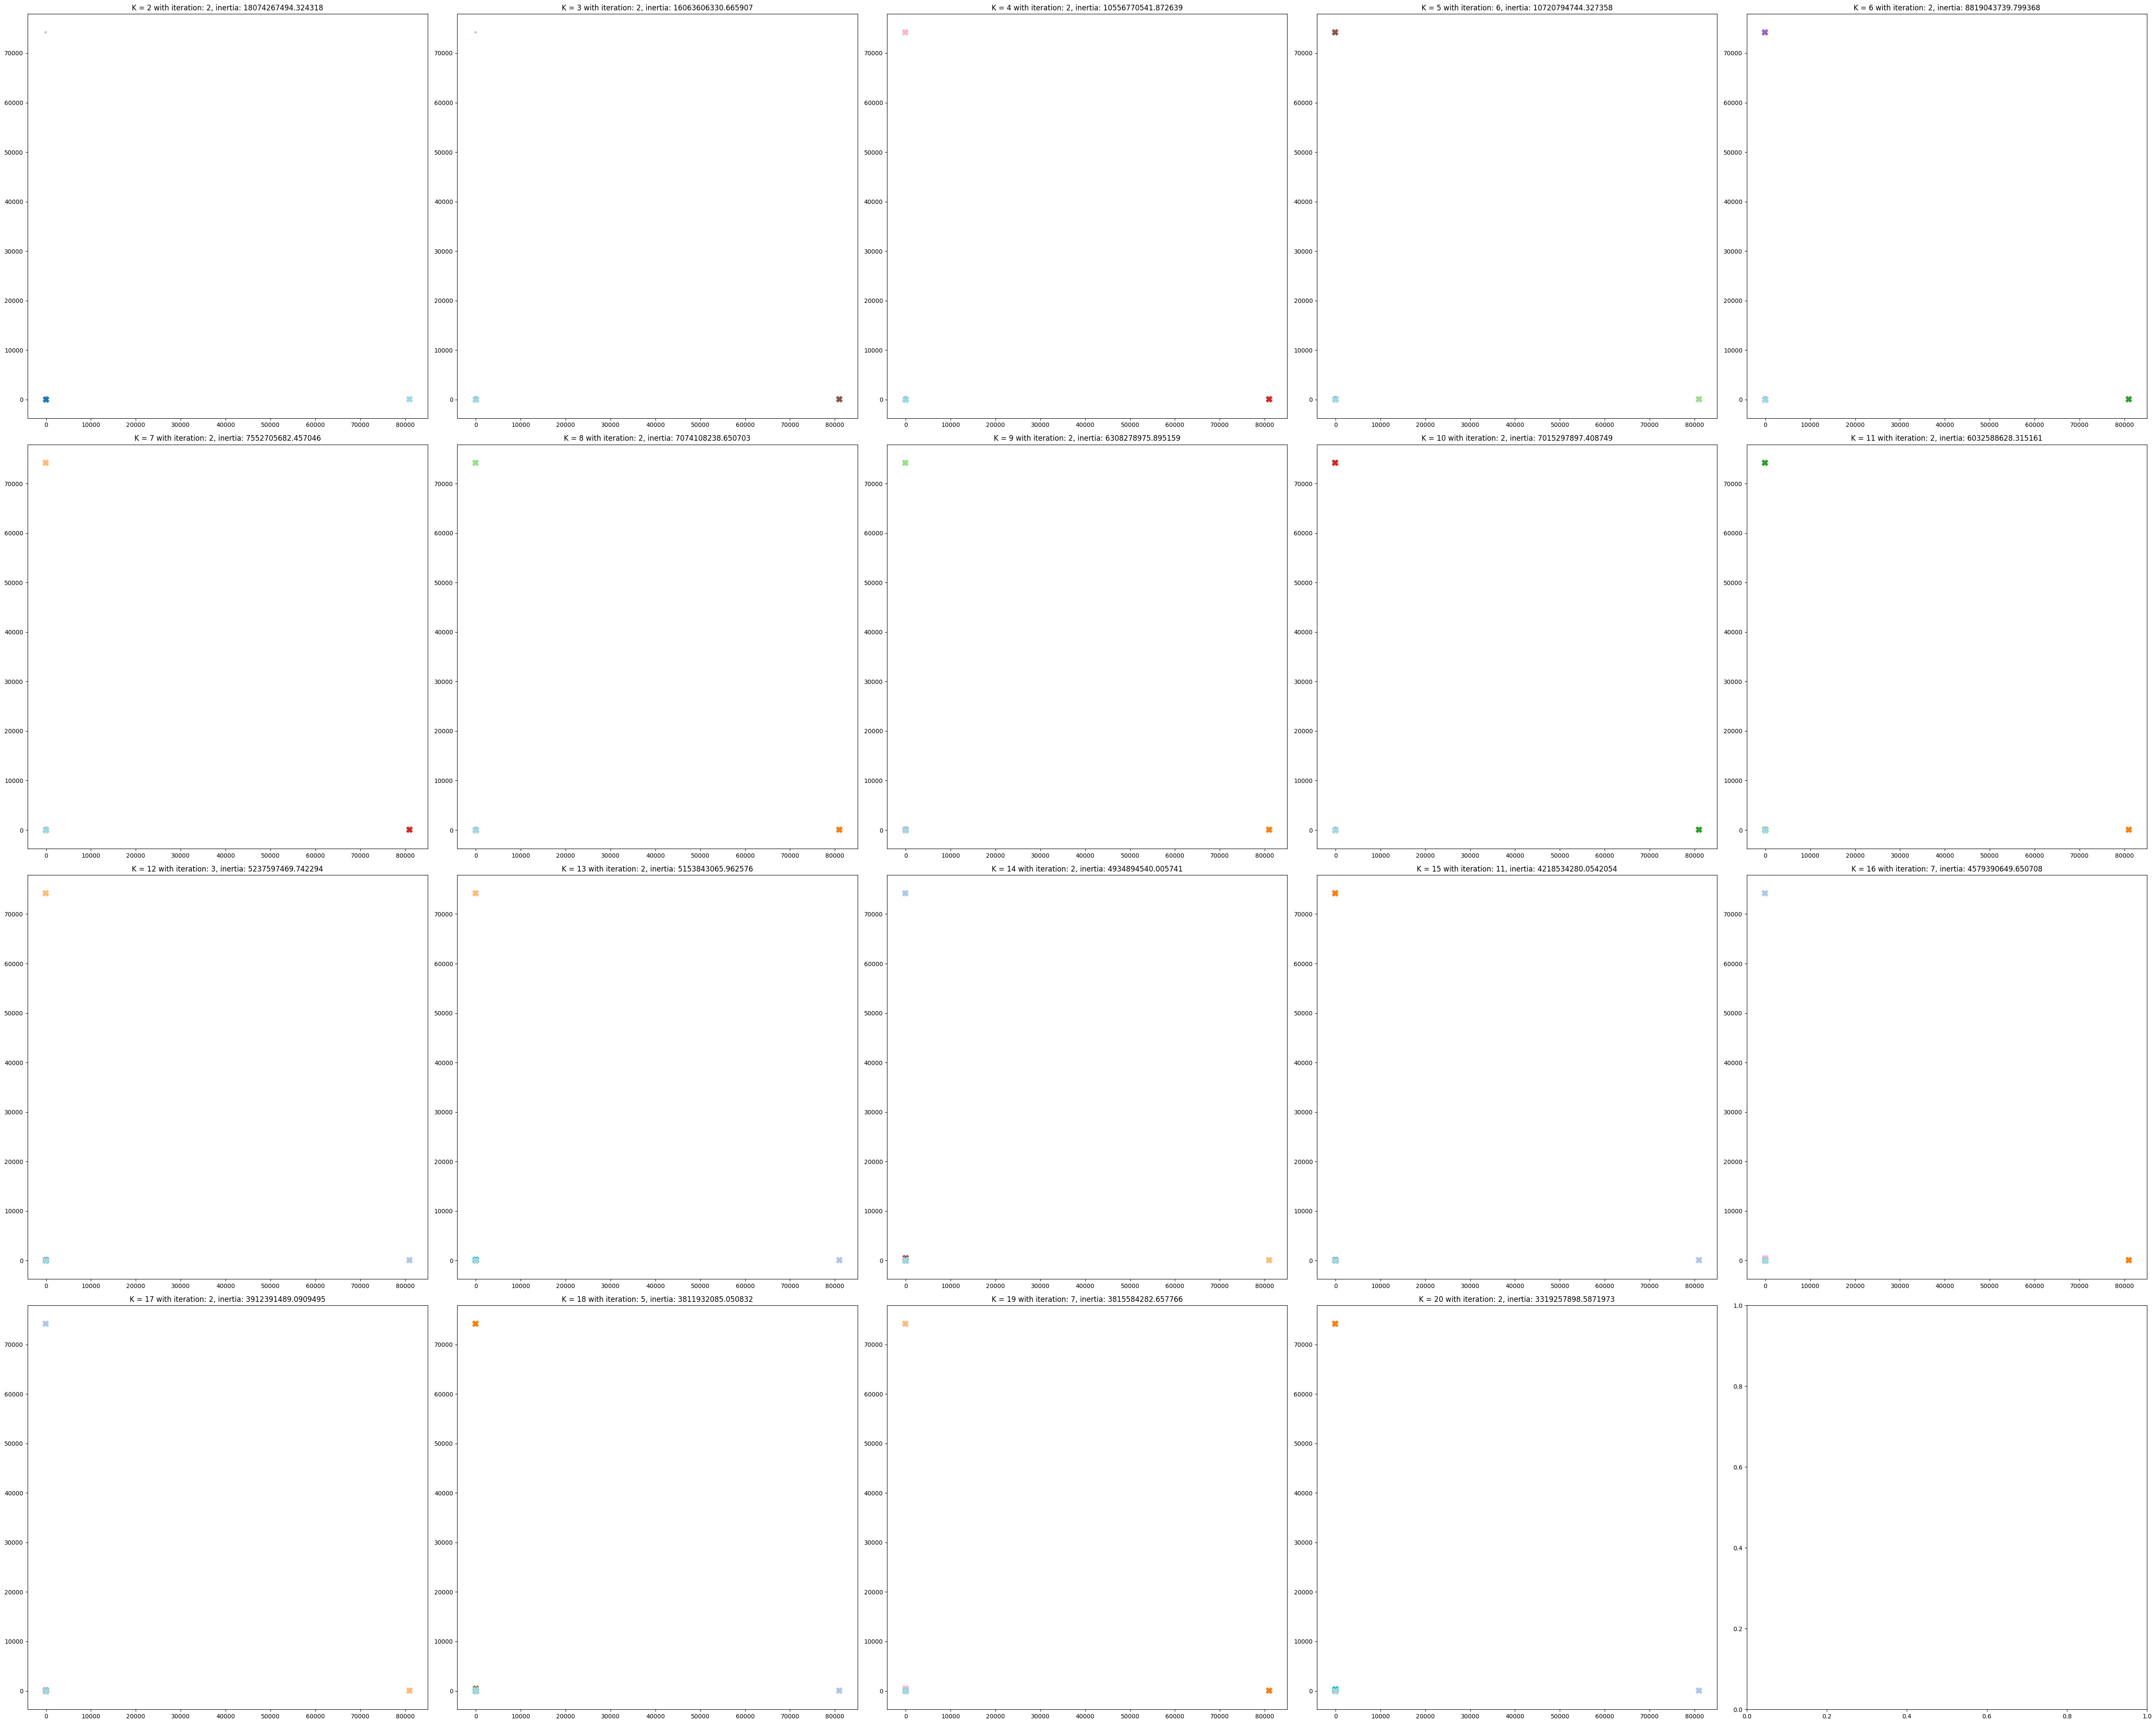

In [24]:
n_k = MAX_K - MIN_K + 1

ncols = 5
nrows = (n_k - 1) // ncols + 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 10*nrows))

for i,k in enumerate(results):

  centroids = results[k]["centroids"]
  centroids_2d = pca.transform(centroids)

  ax = axes.flatten()[i]
  ax.scatter(customer_2d[:, 0], customer_2d[:, 1], c=results[k]["labels"], marker='.', alpha=0.3, cmap='tab20')
  ax.scatter(centroids_2d[:,0], centroids_2d[:,1], c=range(k), marker="X", s=100, cmap='tab20')
  ax.set_title(f"K = {k} with iteration: {results[k]["n_iter"]}, inertia: {results[k]["inertia"]}")

plt.tight_layout()
plt.show()

# Try desnsity base clustering

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
results = {}

for m in ['euclidean', 'manhattan', 'hamming', 'jaccard','cityblock']:
  dbscan = DBSCAN(metric=m)
  dbscan.fit(customer_df)
  results[m] = {
      'labels': dbscan.labels_
  }
  print(f"DBscan with metrics: {m}")

DBscan with metrics: euclidean
DBscan with metrics: manhattan
DBscan with metrics: hamming


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


DBscan with metrics: jaccard
DBscan with metrics: cityblock


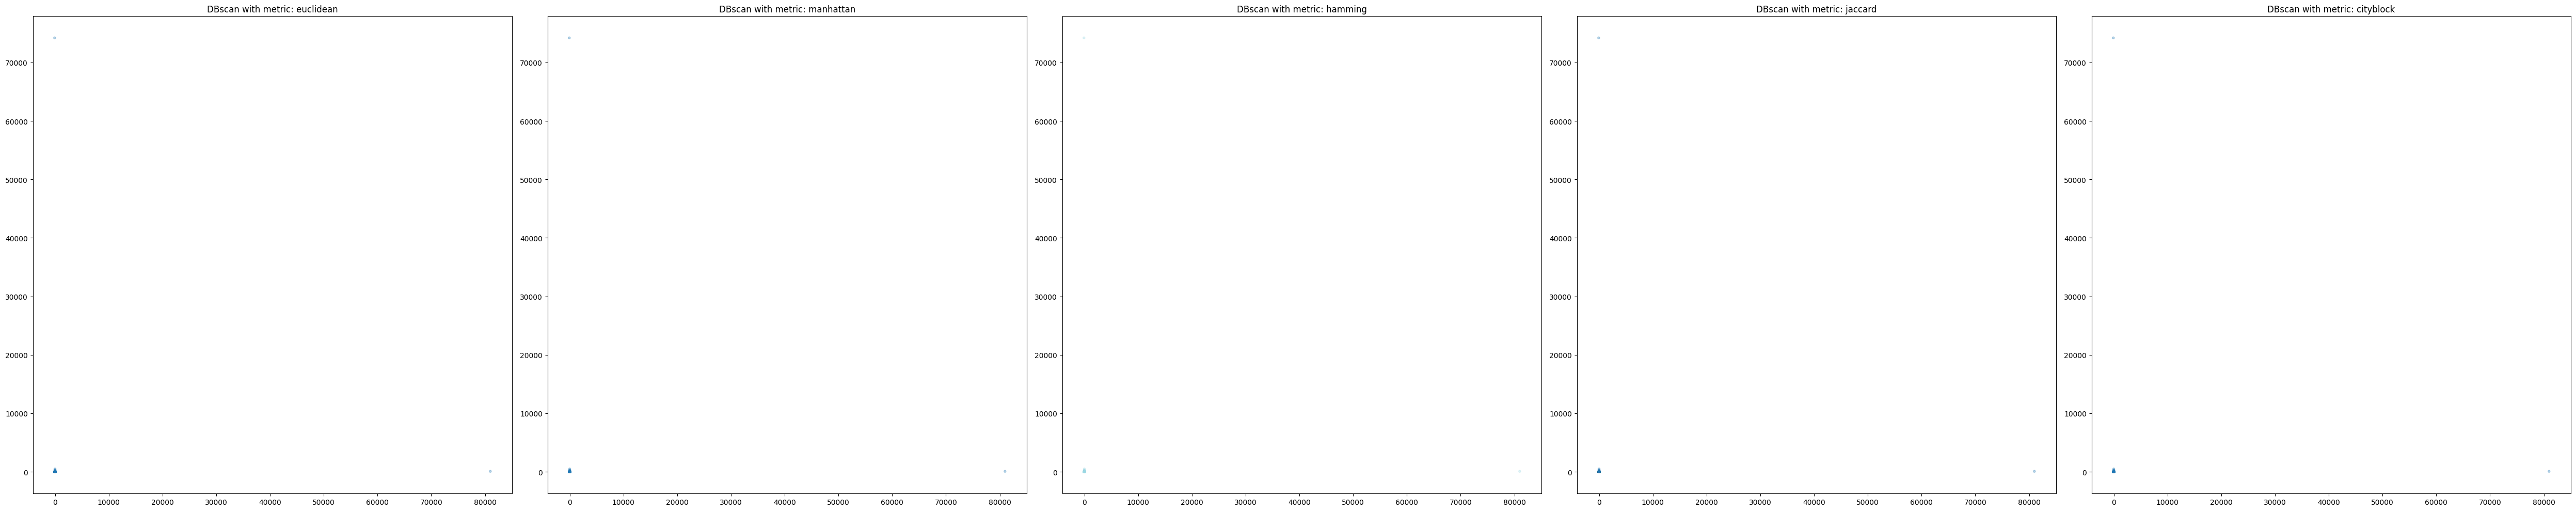

In [36]:
n_k = len(results)
ncols = 5
nrows = (n_k-1) // ncols + 1
fig, ax = plt.subplots(nrows, ncols, figsize=(10*ncols, 10*nrows))
for i,k in enumerate(results):
  row = i//5
  col = i%5

  if nrows != 1:
    ax[row][col].scatter(customer_2d[:,0], customer_2d[:,1], marker='.', c=results[k]['labels'], alpha=0.3, cmap='tab20')
    ax[row][col].set_title(f'DBscan with metric: {k}')
  else:
    ax[col].scatter(customer_2d[:,0], customer_2d[:,1], marker='.', c=results[k]['labels'], alpha=0.3, cmap='tab20')
    ax[col].set_title(f'DBscan with metric: {k}')

plt.tight_layout()
plt.show()

In [39]:
for m in results:
  print(np.unique(results[m]['labels'], return_counts=True))
# Choose jaccard to see customer pattern

(array([-1]), array([5853]))
(array([-1]), array([5853]))
(array([-1,  0]), array([   1, 5852]))
(array([-1,  0,  1,  2,  3,  4,  5]), array([5801,   13,   14,    9,    6,    5,    5]))
(array([-1]), array([5853]))


In [41]:
clusters = {}
for i in set(results['jaccard']['labels']):
  clusters[i] = customer_df.iloc[np.where(results['jaccard']['labels'] == i)]
  print(i, clusters[i].shape[0])

0 13
1 14
2 9
3 6
4 5
5 5
-1 5801


In [43]:
df[df["Customer ID"].isin(clusters[1].index)].sort_values(by=["Customer ID", "Description"])

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
346360,523106,21928,JUMBO BAG SCANDINAVIAN PAISLEY,100,2010-09-20 12:26:00,1.65,12850.0,United Kingdom
346361,523106,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,100,2010-09-20 12:26:00,1.65,12850.0,United Kingdom
593847,541865,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2011-01-24 08:20:00,1.65,13068.0,United Kingdom
1036224,579469,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2011-11-29 15:00:00,1.79,13068.0,United Kingdom
873092,567325,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2011-09-19 14:28:00,1.79,13228.0,United Kingdom
873093,567325,85099B,JUMBO BAG RED RETROSPOT,100,2011-09-19 14:28:00,1.79,13228.0,United Kingdom
469200,533583,85099C,JUMBO BAG BAROQUE BLACK WHITE,60,2010-11-18 11:40:00,1.95,14405.0,United Kingdom
469199,533583,85099B,JUMBO BAG RED RETROSPOT,40,2010-11-18 11:40:00,1.95,14405.0,United Kingdom
221133,510932,85099C,JUMBO BAG BAROQUE BLACK WHITE,20,2010-06-04 10:30:00,1.95,14486.0,United Kingdom
274023,516010,85099C,JUMBO BAG BAROQUE BLACK WHITE,20,2010-07-16 09:42:00,1.95,14486.0,United Kingdom
